Linear Fitting with statsmodels
========================

``````{admonition} Overview
:class: overview

Questions:

* How can I fit a linear equation using statsmodels?

* How can I fit a linear equation with multiple variables using statsmodels?

Objectives:

* Use statsmodels for linear regression.

``````
In this module, we are going to use statsmodels to fit our linear model. We are going to use an interface which allows us to use dataframes and text formulas to specify the equations we want to fit. To import statsmodels, use `import statsmodels.formula.api` as `smf`.

First, we'll use pandas to load the data we cleaned in session 2.

In [1]:
import os
import pandas as pd

import statsmodels.formula.api as smf

In [2]:
file_path = os.path.join("data", "potts_table1_clean.csv")
df = pd.read_csv(file_path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Compound   37 non-null     object 
 1   log P      34 non-null     float64
 2   pi         37 non-null     float64
 3   Hd         37 non-null     float64
 4   Ha         37 non-null     float64
 5   MV         36 non-null     float64
 6   R_2        37 non-null     float64
 7   log K_oct  36 non-null     float64
 8   log K_hex  30 non-null     float64
 9   log K_hep  24 non-null     float64
dtypes: float64(9), object(1)
memory usage: 3.0+ KB


Next, we will use ordinary least squares (`ols`) to fit our equation. When you call `ols`, you give it a formula you would like to fit. The dependent variable goes on the left side, followed by a `~`. Then you put the independent variables you want to fit. To fit `log P` as a function of `MV`, we would expect put `log P ~ MV`. However, since our dependent variable has a space in it, we must group it using a special syntax - `Q('log P')`. Finally, we fit the model using `.fit()`.

In [4]:
regression = smf.ols("Q('log P') ~ MV", data=df).fit()

This performs a fit to your equation using ordinary least squares. You can get a summary of your model by calling `.summary` on the fit.

In [5]:
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Q('log P')   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     24.98
Date:                Wed, 12 May 2021   Prob (F-statistic):           2.16e-05
Time:                        13:54:47   Log-Likelihood:                -34.474
No. Observations:                  33   AIC:                             72.95
Df Residuals:                      31   BIC:                             75.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.2469      0.362    -20.002      0.000      -7.986      -6.508
MV             0.0271      0.005      4.998      0.000       0.016       0.038
==============================================================================
Omnibus:                       21.287   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.520
Skew:                           1.802   Prob(JB):                     6.41e-07
Kurtosis:                       5.783   Cond. No.                         196.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
regression.params

Intercept   -7.246871
MV           0.027056
dtype: float64

Fitted values are stored automatically in `regression.fittedvalues`.

In [7]:
regression.fittedvalues

0    -6.960075
1    -6.659752
2    -6.643518
3    -6.383779
4    -6.343195
5    -6.105100
6    -6.067222
7    -5.910296
9    -5.839950
10   -5.829127
11   -5.788543
13   -5.623500
14   -5.618089
15   -5.553154
16   -5.515276
17   -5.512570
18   -5.461163
19   -5.461163
20   -5.417873
22   -5.417873
23   -5.352939
24   -5.325882
25   -5.325882
27   -5.290709
28   -5.274476
29   -5.236597
30   -5.095905
31   -4.998503
32   -4.957918
33   -4.722530
34   -4.681945
35   -4.433029
36   -4.162467
dtype: float64

In [8]:
df["predicted_values"] = regression.fittedvalues

In [9]:
df.head()

,Compound,log P,pi,Hd,Ha,MV,R_2,log K_oct,log K_hex,log K_hep,predicted_values
0,water,-6.85,0.45,0.82,0.35,10.6,0.00,-1.38,NaN,NaN,-6.960075
1,methanol,-6.68,0.44,0.43,0.47,21.7,0.28,-0.73,-2.42,-2.80,-6.659752
2,methanoicacid,-7.08,0.60,0.75,0.38,22.3,0.30,-0.54,-3.93,-3.63,-6.643518
3,ethanol,-6.66,0.42,0.37,0.48,31.9,0.25,-0.32,-2.24,-2.10,-6.383779
4,ethanoicacid,-7.01,0.65,0.61,0.45,33.4,0.27,-0.31,-3.28,-2.90,-6.343195


You can make predictions using the fitted model by calling `regression.predict` and passing in values for which you want a prediction as part of a pandas dataframe with appropriate column names. Your column names **must** match the column names you performed the fit with.

In [10]:
help(regression.predict)

Help on method predict in module statsmodels.base.model:

predict(exog=None, transform=True, *args, **kwargs) method of statsmodels.regression.linear_model.OLSResults instance
    Call self.model.predict with self.params as the first argument.
    
    Parameters
    ----------
    exog : array_like, optional
        The values for which you want to predict. see Notes below.
    transform : bool, optional
        If the model was fit via a formula, do you want to pass
        exog through the formula. Default is True. E.g., if you fit
        a model y ~ log(x1) + log(x2), and transform is True, then
        you can pass a data structure that contains x1 and x2 in
        their original form. Otherwise, you'd need to log the data
        first.
    *args
        Additional arguments to pass to the model, see the
        predict method of the model for the details.
    **kwargs
        Additional keywords arguments to pass to the model, see the
        predict method of the model for th

In [11]:
to_predict = pd.DataFrame()
to_predict["MV"] = [75, 90]

In [12]:
regression.predict(to_predict)

0   -5.217658
1   -4.811815
dtype: float64

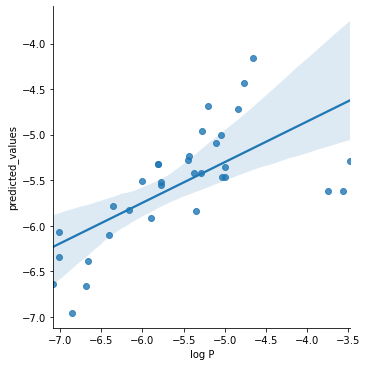

In [18]:
import seaborn as sns

g = sns.lmplot(x="log P", y="predicted_values", data=df)

## Multiple Regression

In [13]:
df.columns

Index(['Compound', 'log P', 'pi', 'Hd', 'Ha', 'MV', 'R_2', 'log K_oct',
       'log K_hex', 'log K_hep', 'predicted_values'],
      dtype='object')

In [16]:
multiple_regression = smf.ols("Q('log P') ~ pi + Hd + Ha + MV + R_2", data=df).fit()

In [17]:
multiple_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Q('log P')   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     150.4
Date:                Wed, 12 May 2021   Prob (F-statistic):           7.87e-19
Time:                        13:55:34   Log-Likelihood:                 11.249
No. Observations:                  33   AIC:                            -10.50
Df Residuals:                      27   BIC:                            -1.518
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.4861      0.199    -22.501      0.000      -4.895      -4.077
pi            -0.9319      0.220     -4.237      0.000      -1.383      -0.481
Hd            -1.3037      0.185     -7.038      0.000      -1.684      -0.924
Ha            -4.3756      0.371    -11.784      0.000      -5.138      -3.614
MV             0.0260      0.002     17.193      0.000       0.023       0.029
R_2            0.5135      0.177      2.900      0.007       0.150       0.877
==============================================================================
Omnibus:                        0.688   Durbin-Watson:                   1.300
Prob(Omnibus):                  0.709   Jarque-Bera (JB):                0.200
Skew:                           0.179   Prob(JB):                        0.905
Kurtosis:                       3.132   Cond. No.                         835.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
df["MR_predicted_values"] = multiple_regression.fittedvalues

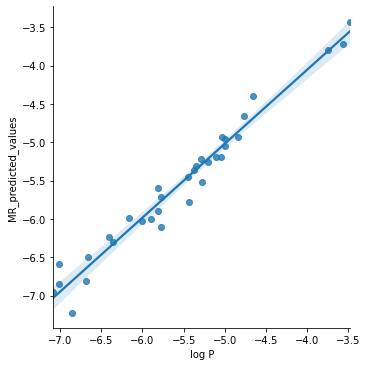

In [20]:
g = sns.lmplot(x="log P", y="MR_predicted_values", data=df)

``````{admonition} Key Points
:class: key

* Statsmodels allows you to specify your equations using data frames and column names.

* Calling `.summary`. on the fit gives you a summary of the fit and parameters.

* You can use `.predict` to predict new values using the fitted model.

* You must give the predict method a dataframe with the same column names as the original dataframe.
``````